### ✅ Fórmulas reales de SSB:

Dada una señal real $m(t)$ y su transformada de Hilbert $\hat{m}(t)$:

* **USB (Upper Sideband):**

$$
s_{\text{USB}}(t) = m(t) \cdot \cos(2\pi f_c t) - \hat{m}(t) \cdot \sin(2\pi f_c t)
$$

* **LSB (Lower Sideband):**

$$
s_{\text{LSB}}(t) = m(t) \cdot \cos(2\pi f_c t) + \hat{m}(t) \cdot \sin(2\pi f_c t)
$$

> La única diferencia entre ambas es el signo delante del término con $\hat{m}(t)$.

---

### ✅ Fórmula para SSB con Portadora (SSB-FC)

$$
s_{SSB-FC}(t) = A_c \cdot \cos(2\pi f_c t) + m(t) \cdot \cos(2\pi f_c t) \pm \hat{m}(t) \cdot \sin(2\pi f_c t)
$$

Donde:

* $A_c \cdot \cos(2\pi f_c t)$: es la **portadora transmitida**.
* $m(t)$: señal de mensaje.
* $\hat{m}(t)$: transformada de Hilbert de $m(t)$.
* El signo **+** para **USB**, y **−** para **LSB**.

---

### 🧠 En otras palabras:

Es simplemente:

$$
s_{SSB-FC}(t) = A_c \cdot \cos(2\pi f_c t) + s_{SSB-SC}(t)
$$

---

### 📌 Ejemplo en palabras:

Si estás transmitiendo **solo USB con portadora**, la fórmula sería:

$$
s_{USB-FC}(t) = A_c \cdot \cos(2\pi f_c t) + m(t) \cdot \cos(2\pi f_c t) + \hat{m}(t) \cdot \sin(2\pi f_c t)
$$

Y para **LSB con portadora**:

$$
s_{LSB-FC}(t) = A_c \cdot \cos(2\pi f_c t) + m(t) \cdot \cos(2\pi f_c t) - \hat{m}(t) \cdot \sin(2\pi f_c t)
$$


In [15]:
import os
import subprocess
import sys

import soundfile as sf
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import butter, filtfilt, hilbert

In [45]:
# import os
# import soundfile as sf

class GetAudio:
    def get_wav_info(self, ruta_archivo):
        with sf.SoundFile(ruta_archivo) as f:
            self.audio_data = f.read(dtype='float32')
            self.audio_samplerate = f.samplerate
            self.audio_n_canales = f.channels
            # self.audio_n_frames = len(f)
            # self.audio_duration = self.audio_n_frames / self.audio_samplerate
            # self.audio_subtype = f.subtype
            self.audio_filename = os.path.basename(ruta_archivo)

audio = GetAudio()
# audio.get_wav_info("../utils/audio_estereo.wav")
audio.get_wav_info("../utils/tono.wav")
# audio.get_wav_info("../utils/vowel_3.wav")
# 
print(audio.audio_filename)
print(audio.audio_samplerate)
print(audio.audio_data.shape[0])
print(audio.audio_n_canales)
sd.play(audio.audio_data, audio.audio_samplerate)
sd.wait()


tono.wav
44100
44100
1


# Clase SSB

### 🔍 ¿Qué está pasando aquí?

1. `audio_data` es tu señal de mensaje $m(t)$: real, por ejemplo una señal de voz.

2. `hilbert(audio_data)` devuelve una **señal analítica** compleja:

   $$
   \text{analytic\_signal}(t) = m(t) + j \cdot \hat{m}(t)
   $$

   * Parte real → $m(t)$
   * Parte imaginaria → $\hat{m}(t)$, la transformada de Hilbert de $m(t)$

3. Entonces:

   * `m = np.real(...)` → tu señal original $m(t)$
   * `m_hat = np.imag(...)` → transformada de Hilbert $\hat{m}(t)$

📌 Nota: Si el `audio_data` ya es una señal real, **la parte real del resultado es idéntica** a `audio_data`. Puedes incluso omitir `np.real` y usar directamente `audio_data`.

---

## 🎚️ Luego haces esto:

```python
cos_carrier = np.cos(2 * np.pi * frecuencia_carrier * time)
sin_carrier = np.sin(2 * np.pi * frecuencia_carrier * time)

usb = m * cos_carrier - m_hat * sin_carrier
lsb = m * cos_carrier + m_hat * sin_carrier
```

### 🔍 ¿Qué significa esto?

Está aplicando la fórmula real de la modulación SSB:

$$
s_{\text{SSB}}(t) = m(t) \cos(2\pi f_c t) \mp \hat{m}(t) \sin(2\pi f_c t)
$$

* El signo **menos** (−) genera la **banda lateral superior (USB)**.
* El signo **más** (+) genera la **banda lateral inferior (LSB)**.

✅ ¡Este es el enfoque correcto y clásico para SSB usando Hilbert!

---

### 💥 Entonces, ¿cuál es tu duda exactamente?

Si estás confundido por esto:

> ¿Por qué se usa la parte real e imaginaria del resultado de `hilbert`?

Es porque:

* La **parte real** es la señal original $m(t)$
* La **parte imaginaria** es la **transformada de Hilbert** $\hat{m}(t)$, la que se necesita para construir la señal SSB

---

### 🧠 ¿Y por qué usar la señal analítica?

Porque **la modulación SSB** se basa en usar:

$$
s(t) = \text{Re}\{[m(t) + j \hat{m}(t)] \cdot e^{j2\pi f_c t}\}
$$

Y si desarrollas eso usando identidades trigonométricas, obtienes:

$$
s(t) = m(t)\cos(2\pi f_c t) - \hat{m}(t)\sin(2\pi f_c t)
$$

(para USB).

---

## ✅ Resumen final

| Concepto                 | Código                                  | Significado             |
| ------------------------ | --------------------------------------- | ----------------------- |
| Señal original (mensaje) | `m = np.real(analytic_signal)`          | $m(t)$                  |
| Transformada de Hilbert  | `m_hat = np.imag(analytic_signal)`      | $\hat{m}(t)$            |
| Señal analítica          | `analytic_signal = hilbert(audio_data)` | $m(t) + j \hat{m}(t)$   |
| Carrier coseno           | `cos(2πf_ct)`                           | Multiplica $m(t)$       |
| Carrier seno             | `sin(2πf_ct)`                           | Multiplica $\hat{m}(t)$ |
| USB                      | `m*cos - m_hat*sin`                     | Banda lateral superior  |
| LSB                      | `m*cos + m_hat*sin`                     | Banda lateral inferior  |


# SSB MONO mod Original

In [17]:
# from scipy.signal import butter, filtfilt
# from scipy.signal import hilbert, welch

# frecuencia de portadora ?
# error de frecuencia ?
# error de fase ?
# archivo ?

class SSB:
    # constructor
    def __init__(self):
        pass

    def ssb_mono_mod(self, audio_data, audio_samplerate, frecuencia_carrier, sc_or_fc, nombre_banda):
        sd.play(audio_data, audio_samplerate)
        sd.wait()
    
        N = len(audio_data)
        print(f"{N}")
        time = np.linspace(0, N / audio_samplerate, N, endpoint=False)
        print(f"Longitud de time: {len(time)}")

        analytic_signal = hilbert(audio_data)
        mensaje = np.real(analytic_signal)
        mensaje_hat = np.imag(analytic_signal)

        # Carriers
        cos_carrier = np.cos(2 * np.pi * frecuencia_carrier * time)
        sin_carrier = np.sin(2 * np.pi * frecuencia_carrier * time)

        # --- Generar bandas laterales ---
        usb = mensaje * cos_carrier - mensaje_hat * sin_carrier  # USB
        lsb = mensaje * cos_carrier + mensaje_hat * sin_carrier  # LSB

        # --- Reproducción de señales moduladas ---
        print("Reproduciendo USB ")
        # sd.play(usb / np.max(np.abs(usb)), samplerate=audio_samplerate)
        sd.play(usb, audio_samplerate)
        sd.wait()

        print("Reproduciendo LSB ")
        # sd.play(lsb / np.max(np.abs(lsb)), samplerate=audio_samplerate)
        sd.play(lsb, audio_samplerate)
        sd.wait()
        
        return usb, lsb
    

    def ssb_mono_demod(self, nombre_banda, banda_lateral, frecuencia_carrier, sample_rate):
        
        # --- Filtro pasa bajas ---
        def lowpass(signal, fs, cutoff=4000, order=6):  # cutoff según el ancho de banda del audio
            nyq = fs / 2
            b, a = butter(order, cutoff / nyq, btype='low')
            return filtfilt(b, a, signal)

        N = len(banda_lateral)
        # print(f"{N}")
        time = np.linspace(0, N / sample_rate, N, endpoint=False)

        # --- Demodulación coherente USB ---
        banda_lateral = banda_lateral * 2 * np.cos(2 * np.pi * frecuencia_carrier * time)  # recuperar m(t)
        banda_lateral_filtered = lowpass(banda_lateral, sample_rate)

        # --- Demodulación coherente LSB ---
        # demod_lsb = lsb * 2 * np.cos(2 * np.pi * fc * t)
        # demod_lsb_filtered = lowpass(demod_lsb, fs)

        # --- Reproducción de audio demodulado ---
        print(f"Reproduciendo audio demodulado desde {nombre_banda}")
        sd.play(banda_lateral_filtered / np.max(np.abs(banda_lateral_filtered)), sample_rate)
        sd.wait()

        # print("Reproduciendo audio demodulado desde LSB...")
        # sd.play(demod_lsb_filtered / np.max(np.abs(demod_lsb_filtered)), fs)
        # sd.wait()

        return banda_lateral_filtered


# PLOT Signal

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import sys

class signal_plot:
    # def __init__(self, f_m=1000, f_c=3000, fs=10000, dur=0.01):
    def __init__(self, time_signal, samplerate, dur=0.01):
        self.fs = samplerate
        self.dur = dur

        # # Crear señales al instanciar
        N = len(time_signal)
        self.t = np.linspace(0, N / samplerate, N, endpoint=False)
        
        self.t_signal = time_signal

    def graficar_senal(self, titulo, lim):
        plt.figure(figsize=(10, 4))
        plt.plot(self.t, self.t_signal)
        # plt.title(f"Señal DSB-SC (f_m=Hz, f_c=Hz)")
        plt.title(f"{titulo}")
        plt.xlabel("Tiempo [s]")
        plt.xlim(0, lim)
        plt.ylabel("Amplitud")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def graficar_espectro(self, titulo):
        espectro = np.abs(np.fft.fft(self.t_signal)) / len(self.t_signal)
        freqs = np.fft.fftfreq(len(self.t_signal), d=1/self.fs)

        plt.figure(figsize=(10, 4))
        plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(espectro))
        # plt.title("Espectro de la señal DSB-SC")
        plt.title(f"{titulo}")
        plt.xlabel("Frecuencia [Hz]")
        plt.ylabel("Magnitud")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Función main

In [19]:
ssb = SSB()
freq_carrier = 5000
usb, lsb = ssb.ssb_mono_mod(audio.audio_data, audio.audio_samplerate, freq_carrier, "sc", "usb")

np.save("../output/signal_mod.npy", usb)  # Guarda en disco

subprocess.Popen([
            sys.executable, "script_plot.py",
            "../output/signal_mod.npy",
            str(audio.audio_samplerate),
            "senal"  # espectro, "senal", o "ambos"
        ])


ssb_demod = ssb.ssb_mono_demod("usb", usb, freq_carrier, audio.audio_samplerate)
np.save("../output/signal_demod.npy", ssb_demod)  # Guarda en disco
subprocess.Popen([
            sys.executable, "script_plot.py",
            "../output/signal_demod.npy",
            str(audio.audio_samplerate),
            "senal"  # espectro, "senal", o "ambos"
        ])

# print(f"ssb{ssb}")
# N = len(audio.audio_data)
# print(f"{N}")

# t = np.linspace(0, N / audio.audio_samplerate, N, endpoint=False)
# print(f"Longitud de t: {len(t)}")



44100
Longitud de time: 44100
Reproduciendo USB 
Reproduciendo LSB 
Reproduciendo audio demodulado desde usb
Figure(1000x400)


<Popen: returncode: None args: ['/bin/python', 'script_plot.py', '../output/...>

# SSB Mono or Estereo - SC or FC 
## Convertiendo clases para software de modulación
## Checkpoint

In [51]:

class SSB:
    # constructor
    def __init__(self):
        pass

    def ssb_mono_mod(self, audio_data, audio_samplerate, sc_or_fc, usb_or_lsb, frecuencia_carrier, error_fase=0, error_frecuencia=0):
        # sd.play(audio_data, audio_samplerate)
        # sd.wait()
        print(f"{error_fase}")
        # Generar vector tiempo
        N = len(audio_data)
        # print(f"{N}")
        time = np.linspace(0, N / audio_samplerate, N, endpoint=False)
        # print(f"Longitud de time: {len(time)}")

        analytic_signal = hilbert(audio_data)
        mensaje = np.real(analytic_signal)
        mensaje_hat = np.imag(analytic_signal)

        # Convertir error de fase en radianes
        error_fase_rad = np.deg2rad(error_fase)  # convierte a radianes
        print(f"{error_fase_rad}")

        if sc_or_fc == "FC":
            full_carrier = np.cos(2 * np.pi * (frecuencia_carrier + error_frecuencia) * time + error_fase_rad)
        else:
            full_carrier = 0

        # Carriers
        cos_carrier = np.cos(2 * np.pi * (frecuencia_carrier + error_frecuencia) * time + error_fase_rad)
        sin_carrier = np.sin(2 * np.pi * (frecuencia_carrier + error_frecuencia) * time + error_fase_rad)

        # --- Generar bandas laterales ---
        usb = full_carrier + mensaje * cos_carrier - mensaje_hat * sin_carrier  # USB
        lsb = full_carrier + mensaje * cos_carrier + mensaje_hat * sin_carrier  # LSB

        # --- Reproducción de señales moduladas ---
        # print("Reproduciendo USB ")
        # sd.play(usb / np.max(np.abs(usb)), samplerate=audio_samplerate)
        # sd.play(usb, audio_samplerate)
        # sd.wait()

        # print("Reproduciendo LSB ")
        # sd.play(lsb / np.max(np.abs(lsb)), samplerate=audio_samplerate)
        # sd.play(lsb, audio_samplerate)
        # sd.wait()
        
        return usb, lsb
    

    def ssb_mono_demod(self, nombre_banda, banda_lateral, frecuencia_carrier, sample_rate):
        
        # --- Filtro pasa bajas ---
        def lowpass(signal, fs, cutoff=4000, order=6):  # cutoff según el ancho de banda del audio
            nyq = fs / 2
            b, a = butter(order, cutoff / nyq, btype='low')
            return filtfilt(b, a, signal)

        N = len(banda_lateral)
        # print(f"{N}")
        time = np.linspace(0, N / sample_rate, N, endpoint=False)

        # --- Demodulación coherente USB ---
        banda_lateral = banda_lateral * 2 * np.cos(2 * np.pi * frecuencia_carrier * time)  # recuperar m(t)
        banda_lateral_filtered = lowpass(banda_lateral, sample_rate)

        # --- Demodulación coherente LSB ---
        # demod_lsb = lsb * 2 * np.cos(2 * np.pi * fc * t)
        # demod_lsb_filtered = lowpass(demod_lsb, fs)

        # --- Reproducción de audio demodulado ---
        # print(f"Reproduciendo audio demodulado desde {nombre_banda}")
        # sd.play(banda_lateral_filtered / np.max(np.abs(banda_lateral_filtered)), sample_rate)
        # sd.wait()

        # print("Reproduciendo audio demodulado desde LSB...")
        # sd.play(demod_lsb_filtered / np.max(np.abs(demod_lsb_filtered)), fs)
        # sd.wait()

        return banda_lateral_filtered
    
    def ssb_estereo_mod(self, audio_data, audio_samplerate, sc_or_fc, usb_or_lsb, frecuencia_carrier, error_fase=0, error_frecuencia=0):
        sd.play(audio_data, audio_samplerate)
        sd.wait()

        # if x.ndim != 2 or x.shape[1] != 2:
        #     raise ValueError("El archivo debe ser estéreo (2 canales)")

        L = audio_data[:, 0]
        R = audio_data[:, 1]

        # --- Normalizar si es entero ---
        # if L.dtype != np.float32:
        #     L = L / np.iinfo(L.dtype).max
        #     R = R / np.iinfo(R.dtype).max

        # --- Tiempo ---
        N = len(L)
        time = np.linspace(0, N / audio_samplerate, N, endpoint=False)

        # Convertir error de fase de grados a radianes
        error_fase_rad = np.deg2rad(error_fase)

        # --- Señal analítica (Hilbert) ---
        L_hilbert = hilbert(L)
        R_hilbert = hilbert(R)

        L_hat = np.imag(L_hilbert)
        R_hat = np.imag(R_hilbert)

        # --- Modulación con fórmula real ---
        cos_carrier = np.cos(2 * np.pi * (frecuencia_carrier+error_frecuencia) * time + error_fase_rad)
        sin_carrier = np.sin(2 * np.pi * (frecuencia_carrier+error_frecuencia) * time + error_fase_rad)

        # Opción de portadora completa o suprimida
        if sc_or_fc == "FC":
            full_carrier = np.cos(2 * np.pi * (frecuencia_carrier+error_frecuencia) * time + error_fase_rad)
        else:
            full_carrier = 0

        # Canal izquierdo: USB
        usb_L = full_carrier + L * cos_carrier - L_hat * sin_carrier
        # Canal derecho: LSB
        lsb_R = full_carrier + R * cos_carrier + R_hat * sin_carrier
        # --- ISB estéreo combinada ---
        isb_stereo = usb_L + lsb_R

        return usb_L, lsb_R, isb_stereo
    
    def ssb_estereo_mod(self, banda_estereo, audio_samplerate, sc_or_fc, usb_or_lsb, frecuencia_carrier, error_fase=0, error_frecuencia=0):
        # --- Filtro pasa bajos (Butterworth) ---
        def lowpass_filter(sig, cutoff, fs, order=5):
            nyq = 0.5 * fs
            norm_cutoff = cutoff / nyq
            b, a = butter(order, norm_cutoff, btype='low')
            return filtfilt(b, a, sig)

        N = len(banda_estereo)
        time = np.linspace(0, N / audio_samplerate, N, endpoint=False)
        cos_carrier = np.cos(2 * np.pi * frecuencia_carrier * time)
        sin_carrier = np.sin(2 * np.pi * frecuencia_carrier * time)

        # --- Demodular señal combinada ISB ---
        # Multiplicación coherente
        demod_cos = banda_estereo * cos_carrier
        demod_sin = banda_estereo * sin_carrier

        # Filtrar para eliminar componente a 2*fc
        cutoff = 5000  # Frecuencia máxima esperada del audio (ajusta según necesidad)
        L_rec = lowpass_filter(demod_cos, cutoff, audio_samplerate) * 2  # Canal izquierdo (USB)
        R_rec = lowpass_filter(demod_cos, cutoff, audio_samplerate) * 2  # Canal derecho (LSB)

        # --- Separar canales usando ortogonalidad ---
        # Por cómo están codificados:
        # L (USB): cos → m(t)
        # R (LSB): sin → m(t)
        L_rec = lowpass_filter(banda_estereo * cos_carrier, cutoff, audio_samplerate) * 2
        R_rec = lowpass_filter(banda_estereo * sin_carrier, cutoff, audio_samplerate) * 2

        # --- Normalizar ---
        L_rec /= np.max(np.abs(L_rec))
        R_rec /= np.max(np.abs(R_rec))

        # --- Combinar en señal estéreo recuperada ---
        rec_stereo = np.stack((L_rec, R_rec), axis=-1)

        return rec_stereo


# Testing

90
1.5707963267948966


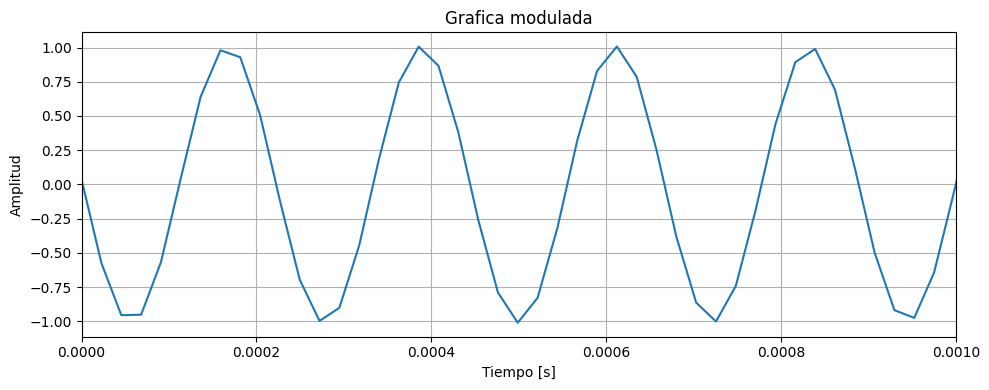

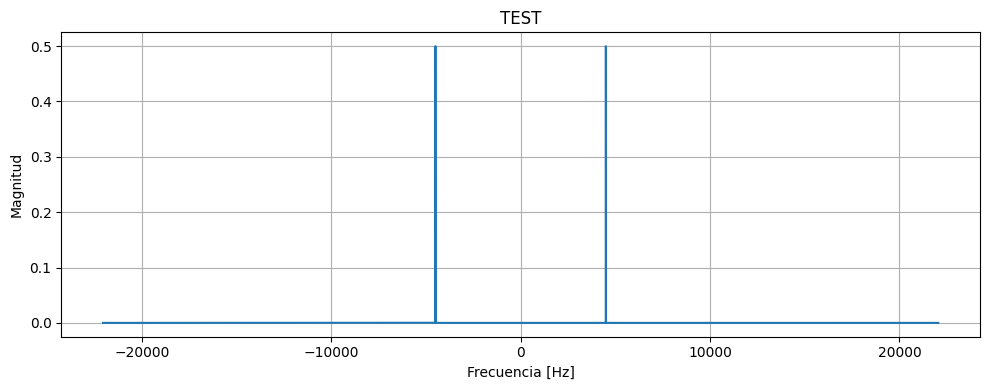

In [66]:
ssb = SSB()
freq_carrier = 5000
usb, lsb = ssb.ssb_mono_mod(audio.audio_data, audio.audio_samplerate, "SC", "usb", freq_carrier, 90, 0)
sd.play(lsb, audio.audio_samplerate)
sd.wait()
plots = signal_plot(lsb, audio.audio_samplerate)
xlim = 0.001
plots.graficar_senal("Grafica modulada", xlim)
plots.graficar_espectro("TEST")

############################

lsb_demod = ssb.ssb_mono_demod("usb", usb, freq_carrier, audio.audio_samplerate)
sd.play(lsb_demod, audio.audio_samplerate)
sd.wait()

# sd.play(audio.audio_data, audio.audio_samplerate)